In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
import scipy
import cv2
import networkx as nx
%matplotlib inline

# 1. Подготовка данных:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Курсач/cover_data.csv", sep = ";",  error_bad_lines=False)
del df['path']
df = df.replace(regex=r',', value='.')
df = df.astype({'fd britness': float,'med britness': float,'ld britness': float,'fd saturation': float,'med saturation': float,'ld saturation': float})
df.describe()

,id,fd britness,med britness,ld britness,fd saturation,med saturation,ld saturation,faces,1mc,2mc,3mc
count,15176.000000,15176.000000,15176.00000,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000
mean,7597.630337,27.465696,106.83263,200.483441,24.327576,93.858065,187.595697,1.121310,75.395954,75.597654,79.534858
std,4386.310258,31.892748,66.81763,46.529598,30.179925,60.213857,57.128914,1.443035,41.210232,40.557469,39.797999
min,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3797.750000,5.000000,52.00000,175.000000,2.000000,46.000000,152.000000,0.000000,37.000000,39.000000,48.000000
50%,7599.500000,15.000000,99.00000,210.000000,15.000000,88.000000,197.000000,1.000000,88.000000,88.000000,93.000000
75%,11395.250000,41.000000,157.25000,238.000000,35.000000,135.000000,236.000000,2.000000,107.000000,107.000000,108.000000
max,15191.000000,242.000000,255.00000,255.000000,249.000000,255.000000,255.000000,20.000000,177.000000,175.000000,178.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


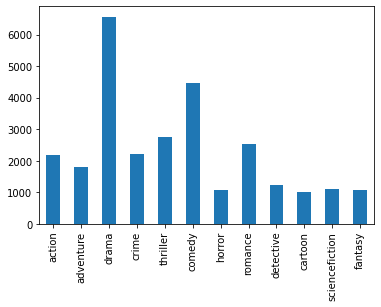

In [ ]:
num_rows = pd.Series()
num_rows['action'] = df[df.genre.str.find('action') != -1].count()[0]
num_rows['adventure'] = df[df.genre.str.find('adventure') != -1].count()[0]
num_rows['drama'] = df[df.genre.str.find('drama') != -1].count()[0]
num_rows['crime'] = df[df.genre.str.find('crime') != -1].count()[0]
num_rows['thriller'] = df[df.genre.str.find('thriller') != -1].count()[0]
num_rows['comedy'] = df[df.genre.str.find('comedy') != -1].count()[0]
num_rows['horror'] = df[df.genre.str.find('horror') != -1].count()[0]
num_rows['romance'] = df[df.genre.str.find('romance') != -1].count()[0]
num_rows['detective'] = df[df.genre.str.find('detective') != -1].count()[0]
num_rows['cartoon'] = df[df.genre.str.find('cartoon') != -1].count()[0]
num_rows['sciencefiction'] = df[df.genre.str.find('sciencefiction') != -1].count()[0]
num_rows['fantasy'] = df[df.genre.str.find('fantasy') != -1].count()[0]
num_rows.plot.bar()

# 2. Яркость

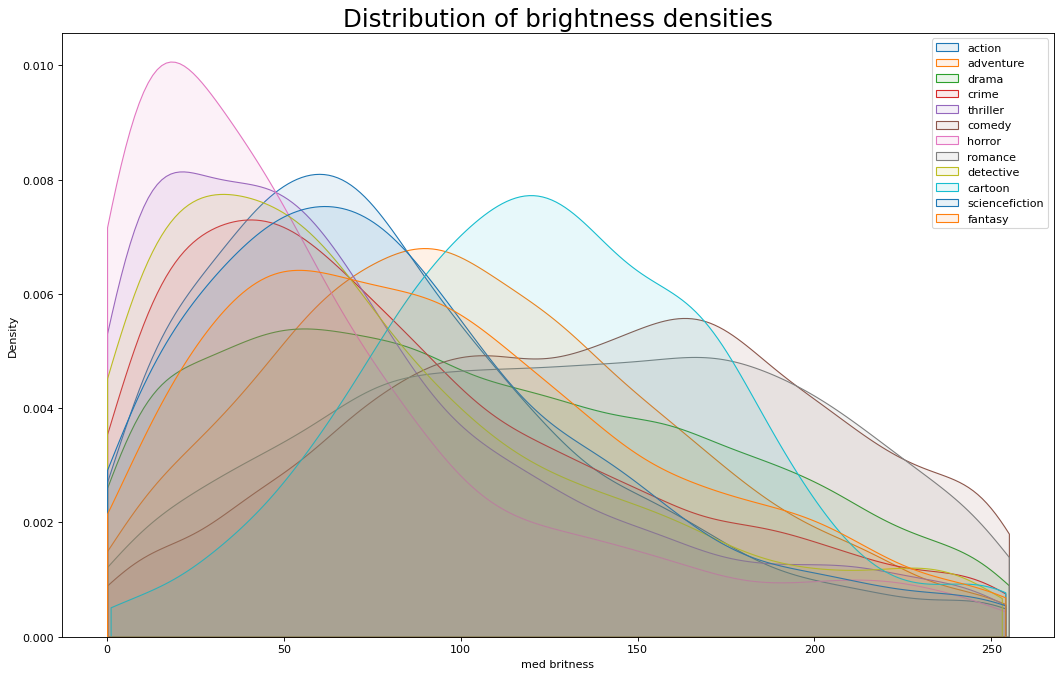

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
bri_graph = nx.Graph()
for ind in num_rows.index :
    bri_graph.add_node(ind)
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['med britness'], shade=True, label= ind, alpha=.1, cut = 0)
plt.title('Distribution of brightness densities', fontsize=22)
plt.legend()
plt.show()

In [ ]:
for ind in num_rows.index :
    print(ind, (df[df.genre.str.find(ind) != -1]['med britness']).median())

action 72.0
adventure 99.0
drama 96.0
crime 70.0
thriller 57.0
comedy 140.0
horror 43.0
romance 132.0
detective 61.0
cartoon 123.0
sciencefiction 74.0
fantasy 87.0


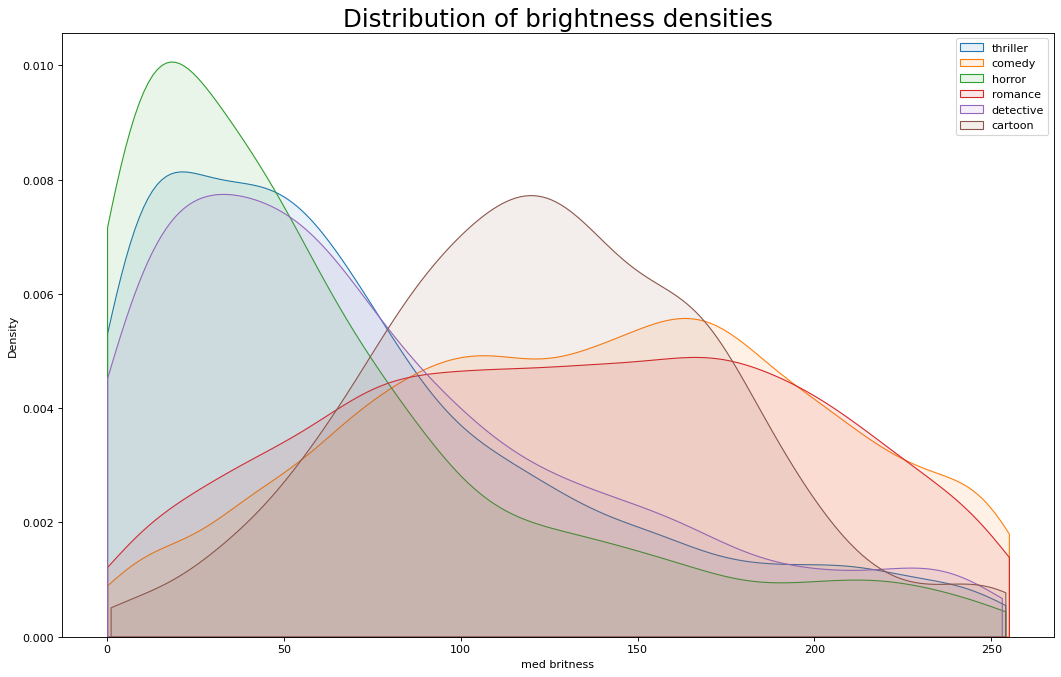

In [ ]:
mbr = num_rows.drop(labels=['action', 'adventure', 'crime', 'sciencefiction', 'fantasy', 'drama'])
plt.figure(figsize=(16,10), dpi= 80)
for ind in mbr.index :
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['med britness'], shade=True, label= ind, alpha=.1, cut = 0)
plt.title('Distribution of brightness densities', fontsize=22)
plt.legend()
plt.show()

In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['med britness'], df[df.genre.str.find(ind2) != -1]['med britness'])
    if res.statistic < 0.1  and res.pvalue != 1:
      bri_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)

action and crime Ks_2sampResult(statistic=0.05458368149524629, pvalue=0.0027541452847095194)
action and sciencefiction Ks_2sampResult(statistic=0.02140125068301864, pvalue=0.8837621782288149)
crime and action Ks_2sampResult(statistic=0.05458368149524629, pvalue=0.0027541452847095194)
crime and thriller Ks_2sampResult(statistic=0.09317813669225852, pvalue=0.8554617705176405)
crime and detective Ks_2sampResult(statistic=0.06332525374668957, pvalue=0.003145624360269217)
crime and sciencefiction Ks_2sampResult(statistic=0.05148049843309437, pvalue=0.03961135224941614)
thriller and crime Ks_2sampResult(statistic=0.09317813669225852, pvalue=0.8554617705176405)
thriller and detective Ks_2sampResult(statistic=0.037008153384197384, pvalue=0.18420103018390954)
detective and crime Ks_2sampResult(statistic=0.06332525374668957, pvalue=0.003145624360269217)
detective and thriller Ks_2sampResult(statistic=0.037008153384197384, pvalue=0.18420103018390954)
sciencefiction and action Ks_2sampResult(stati

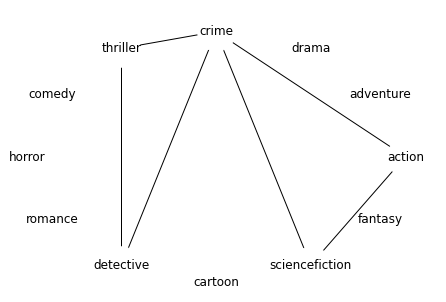

In [ ]:
nx.draw_circular(bri_graph,
         node_color='white',
         node_size=1400,
         with_labels=True)

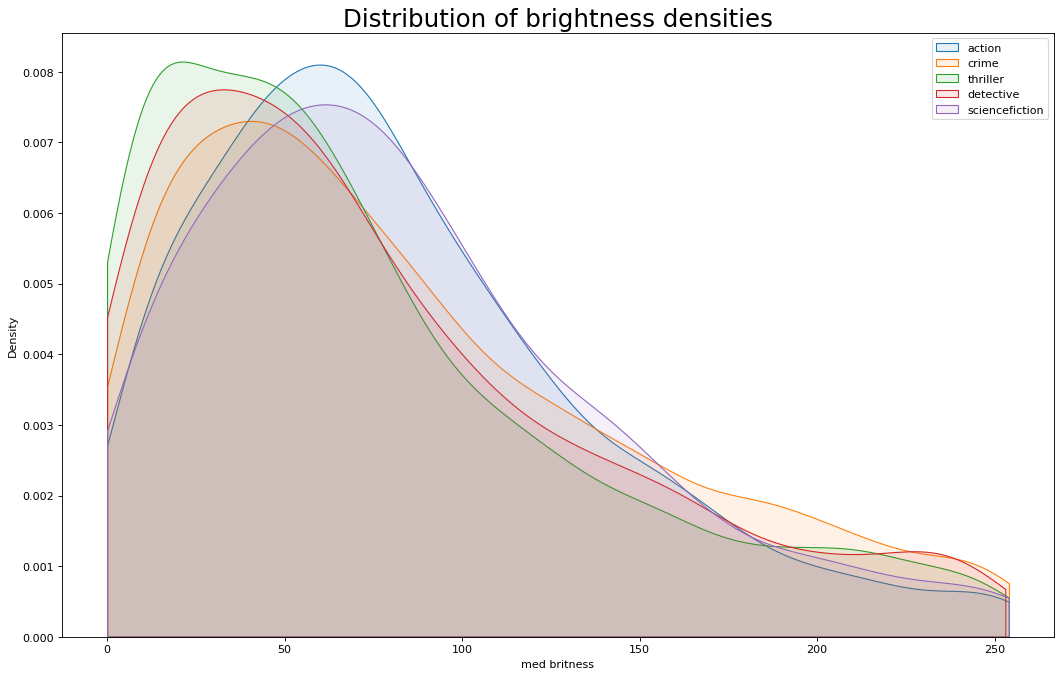

In [ ]:
mcs = num_rows.drop(labels=['comedy', 'adventure', 'horror', 'cartoon', 'fantasy', 'drama','romance'])
plt.figure(figsize=(16,10), dpi= 80)
for ind in mcs.index :
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['med britness'], shade=True, label= ind, alpha=.1, cut = 0)
plt.title('Distribution of brightness densities', fontsize=22)
plt.legend()
plt.show()

# 3. Яркостный контраст

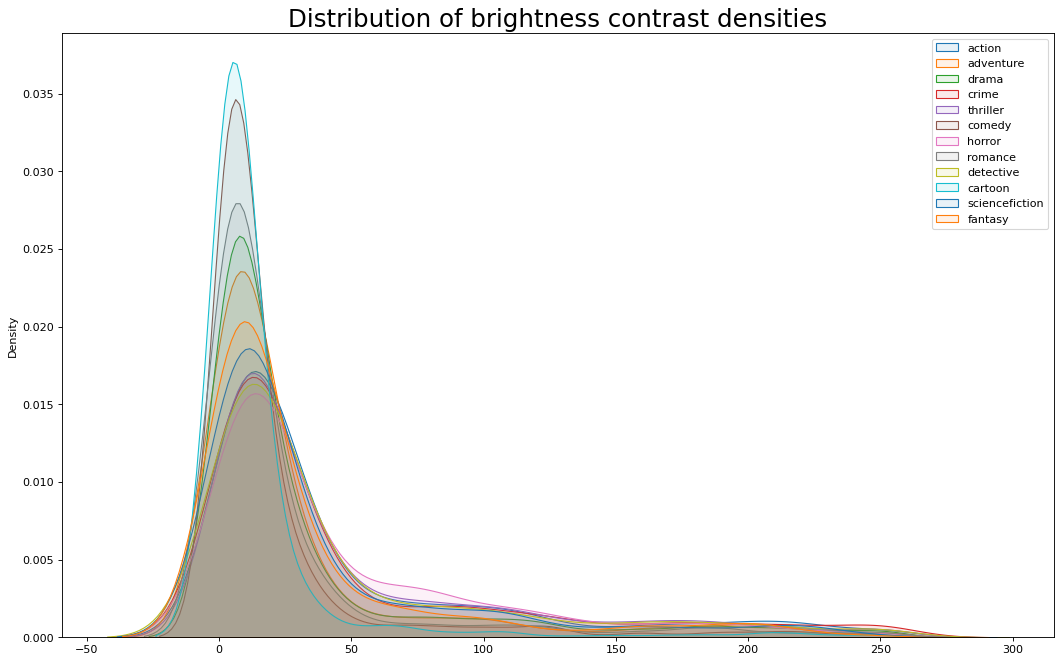

In [ ]:
bric_graph = nx.Graph()
plt.figure(figsize=(16,10), dpi= 80)
for ind in num_rows.index :
    bric_graph.add_node(ind)
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['ld britness']/df[df.genre.str.find(ind) != -1]['fd britness'], shade=True, label= ind, alpha=.1)
plt.title('Distribution of brightness contrast densities', fontsize=22)
plt.legend()
plt.show()

In [ ]:
for ind in num_rows.index :
    print(ind, (df[df.genre.str.find(ind) != -1]['ld britness']/df[df.genre.str.find(ind) != -1]['fd britness']).median())

action 23.598214285714285
adventure 11.61111111111111
drama 12.75
crime 23.181818181818183
thriller 26.732142857142858
comedy 7.526666666666666
horror 29.58571428571429
romance 8.444444444444445
detective 23.666666666666668
cartoon 5.405405405405405
sciencefiction 18.236363636363635
fantasy 13.767857142857142


In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['ld britness']/df[df.genre.str.find(ind1) != -1]['fd britness'], df[df.genre.str.find(ind2) != -1]['ld britness']/df[df.genre.str.find(ind2) != -1]['fd britness'])
    if res.statistic < 0.05  and res.pvalue != 1:
      bric_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)

action and crime Ks_2sampResult(statistic=0.03006102706725033, pvalue=0.267269702859272)
action and thriller Ks_2sampResult(statistic=0.04385284104320274, pvalue=0.8268925265690531)
action and detective Ks_2sampResult(statistic=0.03592194009637864, pvalue=0.2506619249694306)
crime and action Ks_2sampResult(statistic=0.03006102706725033, pvalue=0.267269702859272)
crime and thriller Ks_2sampResult(statistic=0.045232214690503, pvalue=0.8610307390415812)
crime and detective Ks_2sampResult(statistic=0.016507337700775313, pvalue=0.9783694588969819)
thriller and action Ks_2sampResult(statistic=0.04385284104320274, pvalue=0.8268925265690531)
thriller and crime Ks_2sampResult(statistic=0.045232214690503, pvalue=0.8610307390415812)
thriller and horror Ks_2sampResult(statistic=0.04275171031158473, pvalue=0.11474601468033152)
thriller and detective Ks_2sampResult(statistic=0.04385412753098385, pvalue=0.07078077086205203)
horror and thriller Ks_2sampResult(statistic=0.04275171031158473, pvalue=0.11

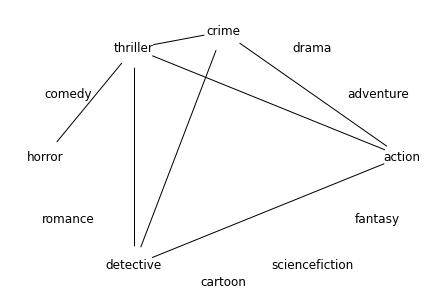

In [ ]:
#plt.figure(figsize=(8,6), dpi= 80)
nx.draw_circular(bric_graph,
         node_color='white',
         node_size=1400,
         with_labels=True)

# 4. Насыщенность

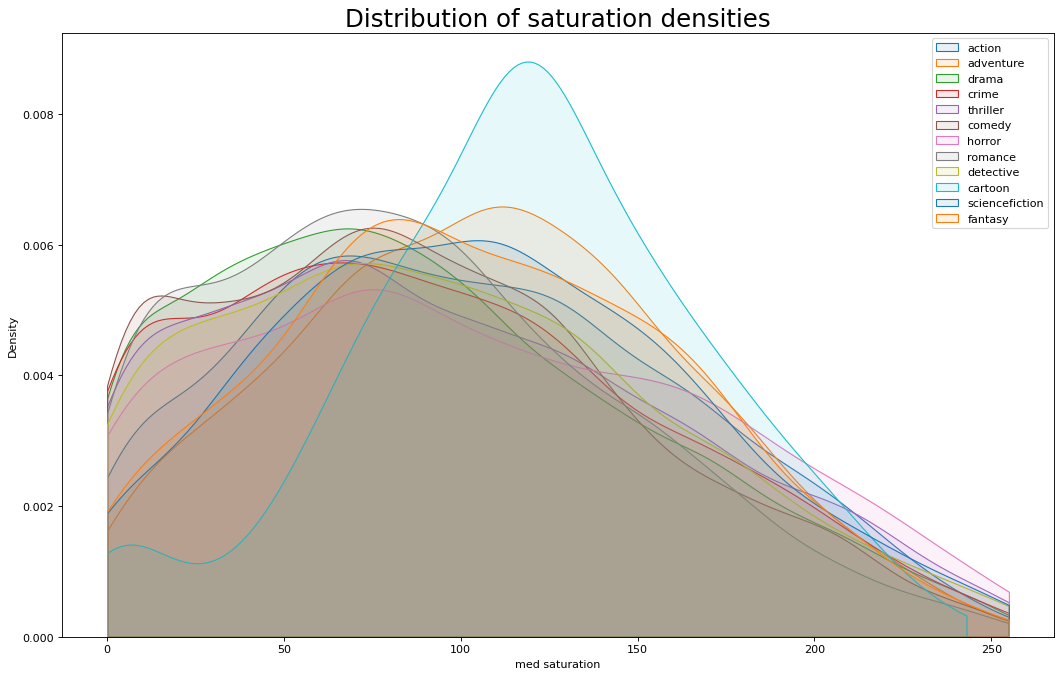

In [ ]:
sat_graph = nx.Graph()
plt.figure(figsize=(16,10), dpi= 80)
for ind in num_rows.index :
    sat_graph.add_node(ind)
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['med saturation'], shade=True, label= ind, alpha=.1, cut = 0)
plt.title('Distribution of saturation densities', fontsize=22)
plt.legend()
plt.show()

In [ ]:
for ind in num_rows.index :
    print(ind, (df[df.genre.str.find(ind) != -1]['med saturation']).median())

action 98.0
adventure 108.0
drama 82.0
crime 86.0
thriller 88.5
comedy 84.0
horror 96.0
romance 81.0
detective 90.0
cartoon 120.0
sciencefiction 103.5
fantasy 102.0


In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['med saturation'], df[df.genre.str.find(ind2) != -1]['med saturation'])
    if res.statistic < 0.05  and res.pvalue != 1:
      sat_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)

action and horror Ks_2sampResult(statistic=0.046820455732387786, pvalue=0.0825523550753654)
action and sciencefiction Ks_2sampResult(statistic=0.044907210653067006, pvalue=0.10260788979120294)
adventure and sciencefiction Ks_2sampResult(statistic=0.03736304011180317, pvalue=0.2874555763772385)
adventure and fantasy Ks_2sampResult(statistic=0.046973815486734675, pvalue=0.09659246013482581)
crime and thriller Ks_2sampResult(statistic=0.030676236508696712, pvalue=0.9204032821357118)
crime and detective Ks_2sampResult(statistic=0.02626438893525047, pvalue=0.6284113272869543)
thriller and crime Ks_2sampResult(statistic=0.030676236508696712, pvalue=0.9204032821357118)
thriller and detective Ks_2sampResult(statistic=0.027584232570914583, pvalue=0.5190677322976782)
horror and action Ks_2sampResult(statistic=0.046820455732387786, pvalue=0.0825523550753654)
detective and crime Ks_2sampResult(statistic=0.02626438893525047, pvalue=0.6284113272869543)
detective and thriller Ks_2sampResult(statistic

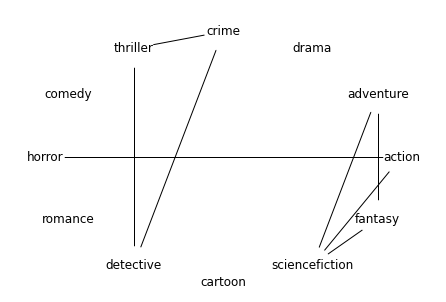

In [ ]:
#plt.figure(figsize=(8,6), dpi= 80)
nx.draw_circular(sat_graph,
         node_color='white',
         node_size=1400,
         with_labels=True)

# 5. Контраст по насыщенности

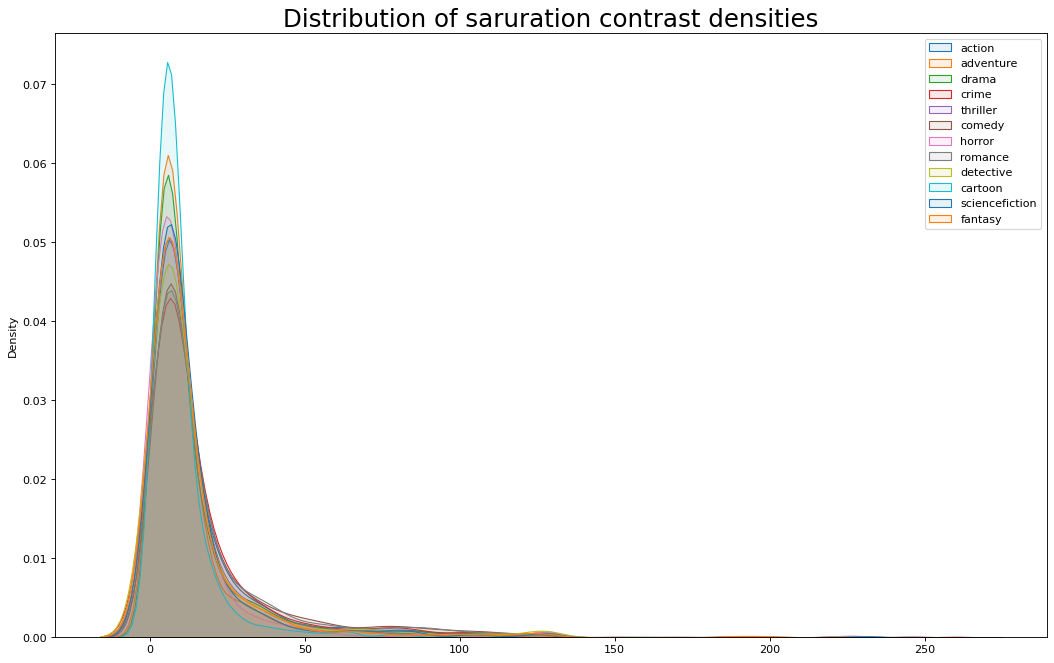

In [ ]:
satc_graph = nx.Graph()
plt.figure(figsize=(16,10), dpi= 80)
for ind in num_rows.index :
    satc_graph.add_node(ind)
    sns.kdeplot(df[df.genre.str.find(ind) != -1]['ld saturation']/df[df.genre.str.find(ind) != -1]['fd saturation'], shade=True, label= ind, alpha=.1)
plt.title('Distribution of saruration contrast densities', fontsize=22)
plt.legend()
plt.show()

In [ ]:
for ind in num_rows.index :
    print(ind, (df[df.genre.str.find(ind) != -1]['ld saturation']/df[df.genre.str.find(ind) != -1]['fd saturation']).median())

action 11.9375
adventure 8.149074074074075
drama 11.352941176470589
crime 15.96875
thriller 13.421052631578947
comedy 14.333333333333334
horror 11.461538461538462
romance 13.8
detective 11.125
cartoon 6.894221808014912
sciencefiction 9.68421052631579
fantasy 8.310344827586206


In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['ld saturation']/df[df.genre.str.find(ind1) != -1]['fd saturation'],
                         df[df.genre.str.find(ind2) != -1]['ld saturation']/df[df.genre.str.find(ind2) != -1]['fd saturation'])
    if res.statistic < 0.05  and res.pvalue != 1:
      satc_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)

action and romance Ks_2sampResult(statistic=0.03553234826003771, pvalue=0.15083024695304148)
action and detective Ks_2sampResult(statistic=0.042797372995373055, pvalue=0.1058917012662488)
adventure and fantasy Ks_2sampResult(statistic=0.03215543746055016, pvalue=0.4728602056406044)
crime and thriller Ks_2sampResult(statistic=0.04005864824619187, pvalue=0.8709878659910337)
thriller and crime Ks_2sampResult(statistic=0.04005864824619187, pvalue=0.8709878659910337)
romance and action Ks_2sampResult(statistic=0.03553234826003771, pvalue=0.15083024695304148)
detective and action Ks_2sampResult(statistic=0.042797372995373055, pvalue=0.1058917012662488)
fantasy and adventure Ks_2sampResult(statistic=0.03215543746055016, pvalue=0.4728602056406044)


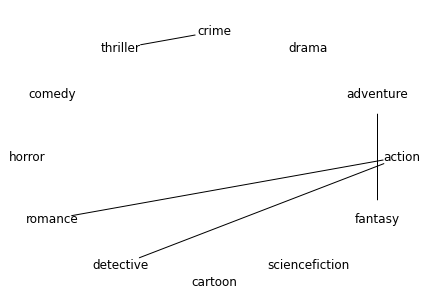

In [ ]:
#plt.figure(figsize=(8,6), dpi= 80)
nx.draw_circular(satc_graph,
         node_color='white',
         node_size=1400,
         with_labels=True)

# 6. Цвета

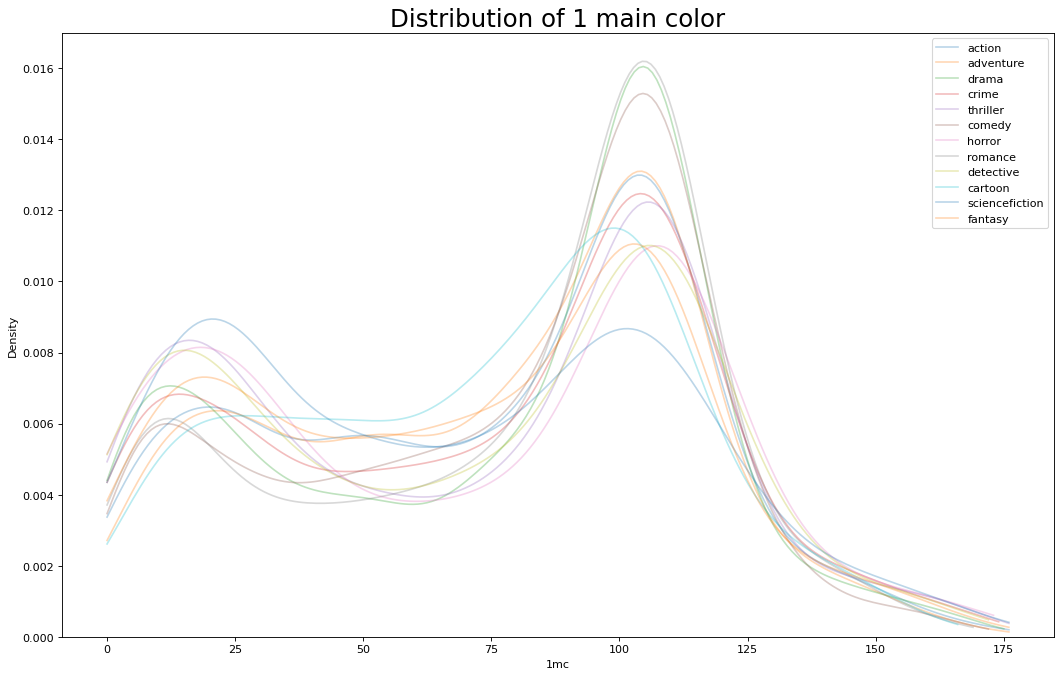

In [ ]:
grad = {}
dom_colors = {}
ndom_colors = {}
col_graph = nx.Graph()
plt.figure(figsize=(16,10), dpi= 80)
for i, ind in enumerate(num_rows.index) :
    col_graph.add_node(ind)
    ax = sns.kdeplot(df[df.genre.str.find(ind) != -1]['1mc'], shade=False, label= ind, alpha=.3, cut = 0)
    x = ax.lines[i].get_xdata() 
    y = ax.lines[i].get_ydata()
    arr = np.array([])
    for j in range (len(x)):
      arr = np.append(arr, np.full(int(y[j]*10000), x[j]))
    grad[ind] = arr
    f = scipy.interpolate.interp1d(x, y, kind = 'linear')
    res = scipy.optimize.minimize_scalar(f, bounds=(10, 150), method='bounded')
    ndom_colors[ind] = res.x
    fmaxid = np.argmax(y[int(res.x):]) + int(res.x)
    smaxid = np.argmax(y[:int(res.x)]) 
    dom_colors[ind] = [x[fmaxid], x[smaxid]]

plt.title('Distribution of 1 main color', fontsize=22)
plt.legend()
plt.show()

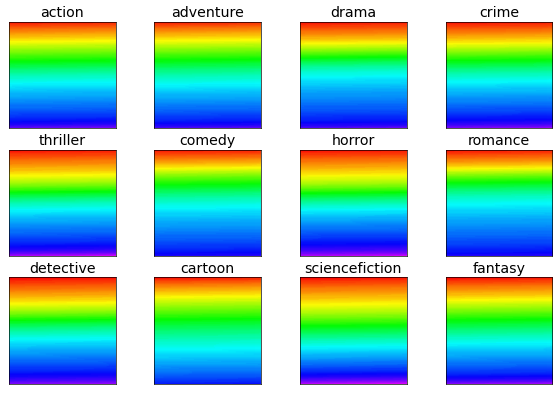

In [ ]:
plt.figure(figsize=(12, 8), dpi=60)
a = np.full([102, 102], 250 , dtype='uint8')
for i, (key, value) in enumerate(grad.items()):
    hue = np.reshape(value[:10404], [102, 102])
    gradient = np.stack((hue, a, a), axis=2)
    plt.subplot(3,4,i+1)
    gradient = gradient.astype('uint8')
    plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_HSV2RGB))
    plt.title(key, fontsize = 17)
    plt.xticks([]), plt.yticks([])

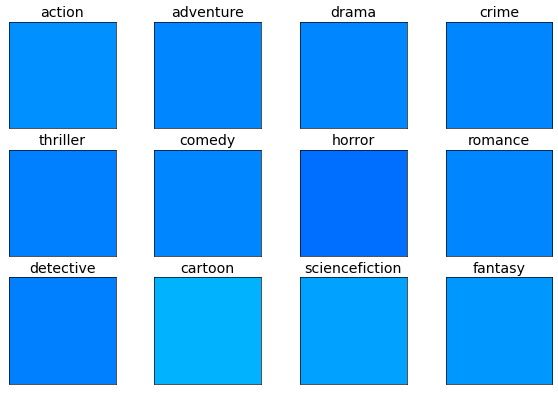

In [ ]:
plt.figure(figsize=(12, 8), dpi=60)
plt.title('Global maximum color', fontsize=22)
for i, (key, value) in enumerate(dom_colors.items()):
    dom_color = np.full([300,300,3], [max(value[0], value[1]), 255, 255], dtype='uint8')
    plt.subplot(3,4,i+1)
    res = cv2.cvtColor(dom_color, cv2.COLOR_HSV2RGB)
    plt.imshow(cv2.cvtColor(dom_color, cv2.COLOR_HSV2RGB))
    plt.title(key, fontsize = 17)
    plt.xticks([]), plt.yticks([])
    i+=1


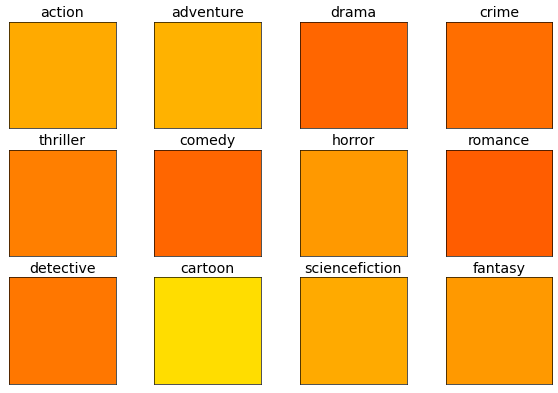

In [ ]:
plt.figure(figsize=(12, 8), dpi=60)
for i, (key, value) in enumerate(dom_colors.items()):
    dom_color = np.full([300,300,3], [min(value[1], value[0]), 255, 255], dtype='uint8')
    plt.subplot(3,4,i+1)
    plt.imshow(cv2.cvtColor(dom_color, cv2.COLOR_HSV2RGB))
    plt.title(key, fontsize = 17)
    plt.xticks([]), plt.yticks([])

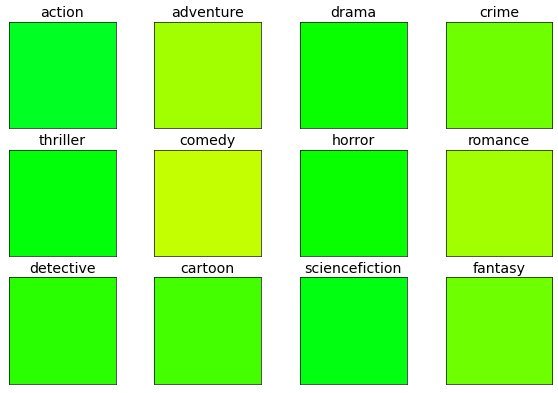

In [ ]:
plt.figure(figsize=(12, 8), dpi=60)
for i, (key, value) in enumerate(ndom_colors.items()):
    dom_color = np.full([300,300,3], [value, 255, 255], dtype='uint8')
    plt.subplot(3,4,i+1)
    plt.imshow(cv2.cvtColor(dom_color, cv2.COLOR_HSV2RGB))
    plt.title(key, fontsize = 17)
    plt.xticks([]), plt.yticks([])

In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['1mc'], df[df.genre.str.find(ind2) != -1]['1mc'])
    if res.statistic < 0.05  and res.pvalue != 1:
      sat_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)
      col_graph.add_edge(ind1, ind2)

action and adventure Ks_2sampResult(statistic=0.02050081146725226, pvalue=0.7890591649407803)
action and crime Ks_2sampResult(statistic=0.03266257602401174, pvalue=0.18669299709086096)
adventure and action Ks_2sampResult(statistic=0.02050081146725226, pvalue=0.7890591649407803)
adventure and crime Ks_2sampResult(statistic=0.04904910171912481, pvalue=0.015665014966519508)
crime and action Ks_2sampResult(statistic=0.03266257602401174, pvalue=0.18669299709086096)
crime and adventure Ks_2sampResult(statistic=0.04904910171912481, pvalue=0.015665014966519508)
thriller and horror Ks_2sampResult(statistic=0.028988835691203647, pvalue=0.5233796395721491)
thriller and detective Ks_2sampResult(statistic=0.01614040242563325, pvalue=0.9752922442744355)
horror and thriller Ks_2sampResult(statistic=0.028988835691203647, pvalue=0.5233796395721491)
horror and detective Ks_2sampResult(statistic=0.028094291972375493, pvalue=0.7383698017927189)
detective and thriller Ks_2sampResult(statistic=0.01614040242

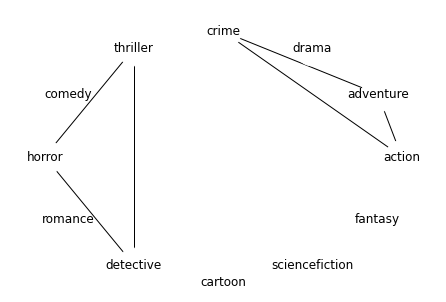

In [ ]:
#plt.figure(figsize=(8,6), dpi= 80)
nx.draw_circular(col_graph,
         node_color='white',
         node_size=1200,
         with_labels=True)

# 7. Люди на фото

In [ ]:
avg = sum(face_data)/len(face_data)
maximum = max(face_data)
print("average:", avg)
print("maximum:", maximum)

average: 1.0203703703703704
maximum: 18


No handles with labels found to put in legend.


global max: 20 global avg: 1.121309963099631


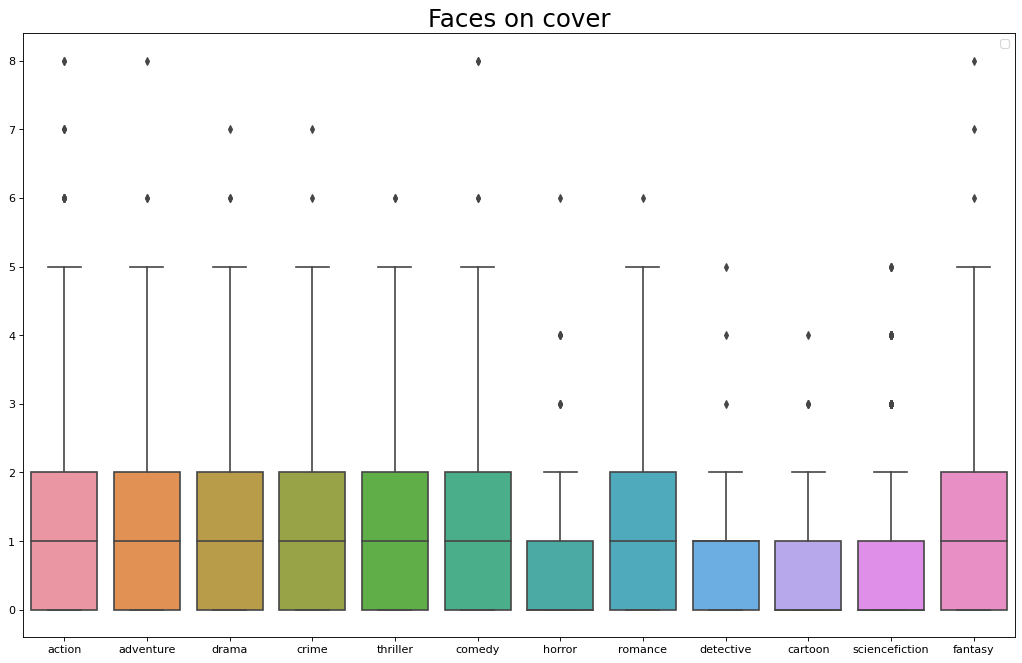

In [ ]:
face_graph = nx.Graph()
plt.figure(figsize=(16,10), dpi= 80)
fdf = pd.DataFrame()
for ind in num_rows.index :
    face_graph.add_node(ind)
    fdf[ind] = df[df.genre.str.find(ind) != -1]['faces']
print('global max:', df['faces'].max(), 'global avg:', df['faces'].sum()/len(df['faces']))
sns.boxplot(data = fdf)
plt.title('Faces on cover', fontsize=22)
plt.legend()

In [ ]:
# Колмогоров - Смирнов
for ind1 in num_rows.index :
  for ind2 in num_rows.index :
    res = stats.ks_2samp(df[df.genre.str.find(ind1) != -1]['faces'], df[df.genre.str.find(ind2) != -1]['faces'])
    if res.statistic < 0.04  and res.pvalue != 1:
      sat_graph.add_edge(ind1, ind2)
      print(ind1, "and", ind2, res)
      face_graph.add_edge(ind1, ind2)

action and thriller Ks_2sampResult(statistic=0.03883605842511432, pvalue=0.8397402829320155)
action and detective Ks_2sampResult(statistic=0.017961339258419102, pvalue=0.9550745323405825)
adventure and sciencefiction Ks_2sampResult(statistic=0.026821080696836606, pvalue=0.6969132256880113)
adventure and fantasy Ks_2sampResult(statistic=0.03100350212774622, pvalue=0.5197520026411291)
crime and romance Ks_2sampResult(statistic=0.03241513481737441, pvalue=0.21457526800894622)
thriller and action Ks_2sampResult(statistic=0.03883605842511432, pvalue=0.8397402829320155)
thriller and detective Ks_2sampResult(statistic=0.03078002702503387, pvalue=0.3801235549098885)
thriller and fantasy Ks_2sampResult(statistic=0.029237401775417705, pvalue=0.5089090865032502)
romance and crime Ks_2sampResult(statistic=0.03241513481737441, pvalue=0.21457526800894622)
detective and action Ks_2sampResult(statistic=0.017961339258419102, pvalue=0.9550745323405825)
detective and thriller Ks_2sampResult(statistic=0.0

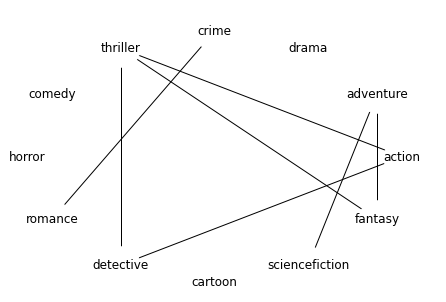

In [ ]:
#plt.figure(figsize=(8,6), dpi= 80)
nx.draw_circular(face_graph,
         node_color='white',
         node_size=1400,
         with_labels=True)